Program written by: Ningyou Li, 20307142 This program 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import pandas as pd
import sys
%config Completer.use_jedi = False

# Part 1

### a. Read Image

In [2]:
# SimpleITK read 'PCC-0312_LAL_GS7.tif'
img = sitk.ReadImage('PCC-0312_LAL_GS7.tif')

def image_Info(image):
    """
    :param image: the input image read by SimpleITK
    :return: None
    This function prints the properties of the image. Properties include: size, spacing, origin, direction, pixel type
    """
    print('Size:', image.GetSize()) #size
    print('Space:', image.GetSpacing()) #space
    print('Origin:', image.GetOrigin()) #origin
    print('Direction:', image.GetDirection()) #direction
    print('Pixel Type:', image.GetPixelIDTypeAsString()) #pixel type
    
image_Info(img)

Size: (512, 10048)
Space: (0.35277777777777775, 0.35277777777777775)
Origin: (0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


In [4]:
# Set external viewer to 3D slicer and Open with external viewer
image_viewer = sitk.ImageViewer()
image_viewer.SetApplication('C:/Users/Linda/AppData/Local/NA-MIC/Slicer 4.11.20210226/Slicer.exe')
image_viewer.Execute(img)

### Visulize the image in 3D Slicer
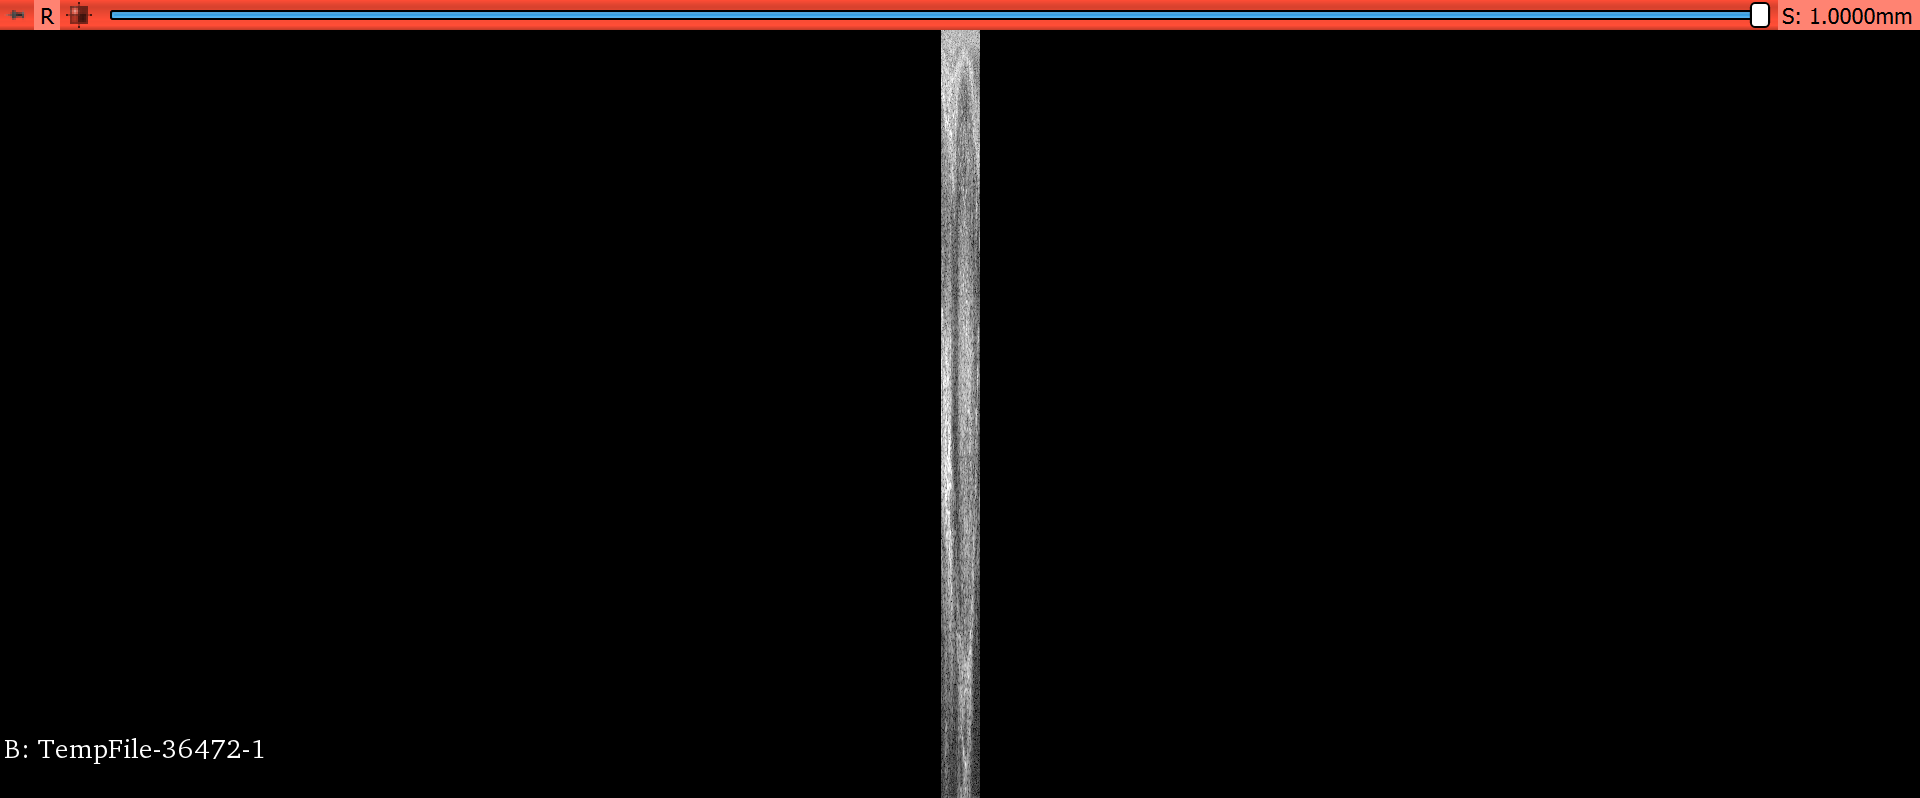

### b. Read .csv

In [6]:
# Read meta_data.csv using Pandas
data = pd.read_csv('meta_data.csv')
print(data, '\n')
print(data['axial (mm)'], '\n')
print(data['lateral (mm)'], '\n')

          data_name  axial (mm)  lateral (mm)  grade     organ    modality
0  PCC-0312_LAL_GS7          28         46.08      7  prostate  ultrasound 

0    28
Name: axial (mm), dtype: int64 

0    46.08
Name: lateral (mm), dtype: float64 



### c. Update New Spacing and Saved As .NNRD

In [19]:
# Calculate new spacing
vertical_spacing = data['axial (mm)']/img.GetSize()[1]
horizontal_spacing = data['lateral (mm)']/img.GetSize()[0]
new_spacing = (0.09, 0.002787)
print(horizontal_spacing)
print(vertical_spacing)
print(new_spacing)
# Calculate lateral to axial ratio
ratio = (data['lateral (mm)']/data['axial (mm)'])
print('lateral to axial ratio is:', ratio)
print('\nThe lateral extent to axial extent ratio is greater than 1, meaning that the width of the image is greater than the length of the image.')

0    0.09
Name: lateral (mm), dtype: float64
0    0.002787
Name: axial (mm), dtype: float64
(0.09, 0.002787)
lateral to axial ratio is: 0    1.645714
dtype: float64

The lateral extent to axial extent ratio is greater than 1, meaning that the width of the image is greater than the length of the image.


In [23]:
def data_resample(image, new_spacing):
    np.array(list(new_spacing))
    resample = sitk.ResampleImageFilter()
    resample.SetInterpolator(sitk.sitkLinear)
    resample.SetTransform(sitk.Transform())
    # set direction
    resample.SetOutputDirection(image.GetDirection())
    # set origin
    resample.SetOutputOrigin(image.GetOrigin())
    # set new spacing
    resample.SetOutputSpacing(new_spacing)
    # set size
    resample.SetSize(image.GetSize())
    # set pixel type
    resample.SetDefaultPixelValue(img.GetPixelIDValue())
    newimage = resample.Execute(image)
    return newimage

# apply the function to resample the intra-operative image with spacing
resample_img = data_resample(img, new_spacing)
image_Info(resample_img)

Size: (512, 10048)
Space: (0.09, 0.002787)
Origin: (0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


In [26]:
# save the resampled image as 'prostate_ultrasound.nrrd'
writer = sitk.ImageFileWriter()
writer.SetFileName('prostate_ultrasound.nrrd')
writer.Execute(resample_img)

### d. prostate_ultrasound.nrrd in 3D Slicer

In [27]:
# Open 'prostate_ultrasound.nrrd' in 3D slicer
prostate_img = sitk.ReadImage('prostate_ultrasound.nrrd')
image_viewer.SetFileExtension('.nrrd')
image_viewer.Execute(prostate_img)

In [28]:
image_Info(prostate_img)

Size: (512, 10048)
Space: (0.09, 0.002787)
Origin: (0.0, 0.0)
Direction: (0.9999999999999999, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


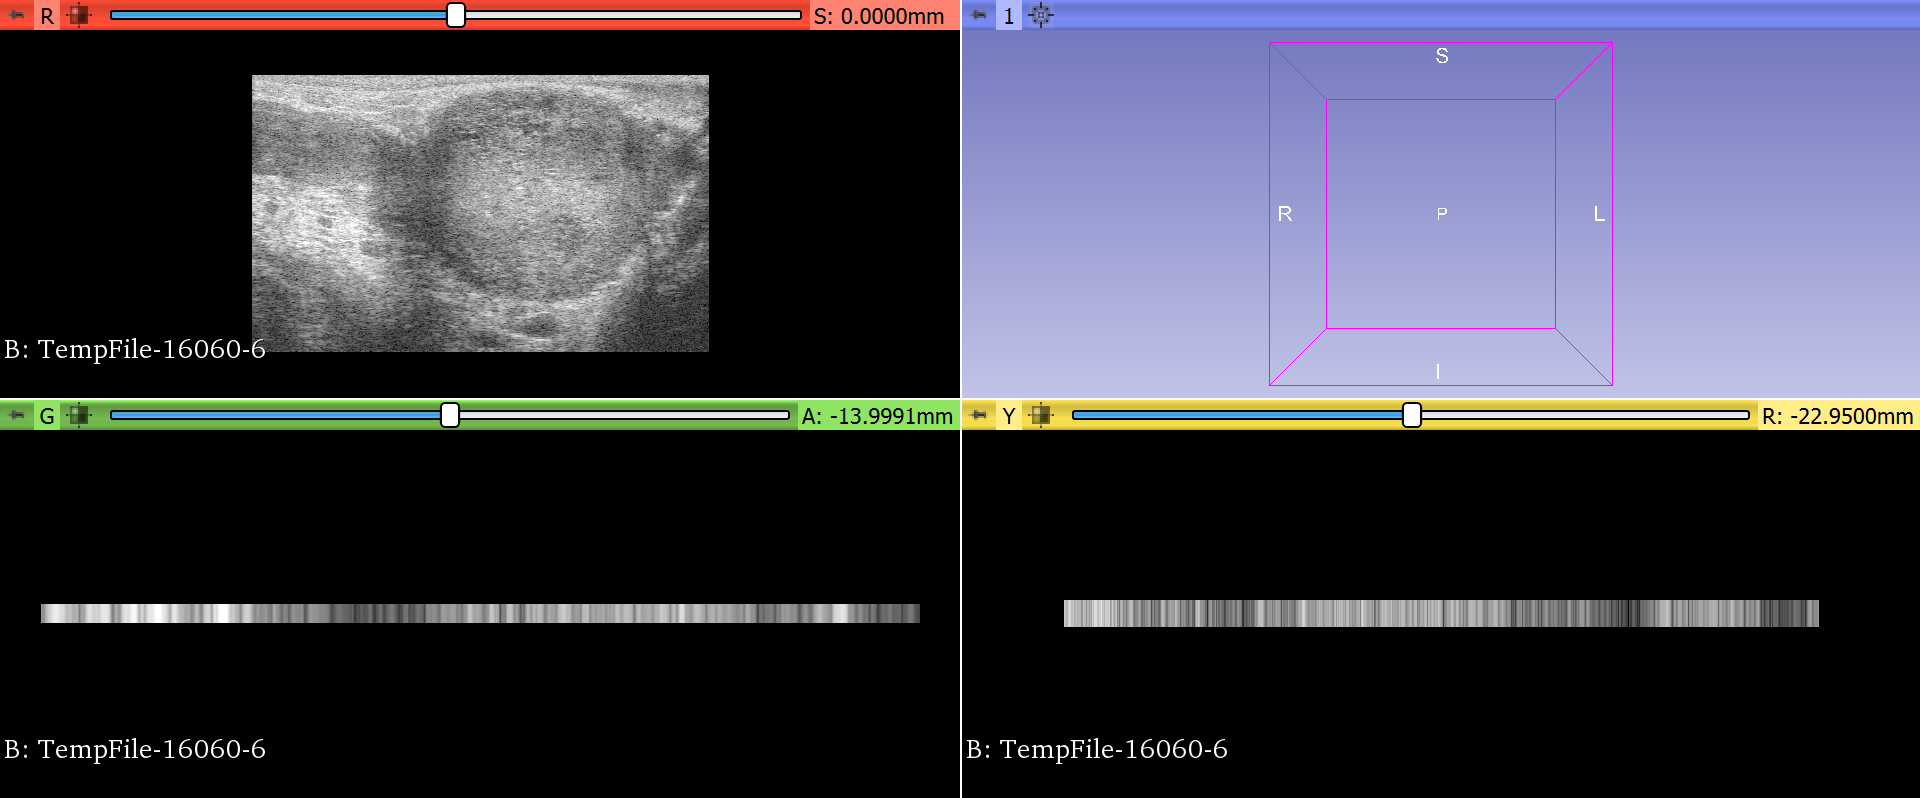

The resampled image has its width greater than its length which looks more like a prostate orgamn (rephrase!!!)

# Part 2



### a. Apply Median Filter

source: https://simpleitk.org/doxygen/v2_0/html/sitkAdaptiveHistogramEqualizationImageFilter_8h.html

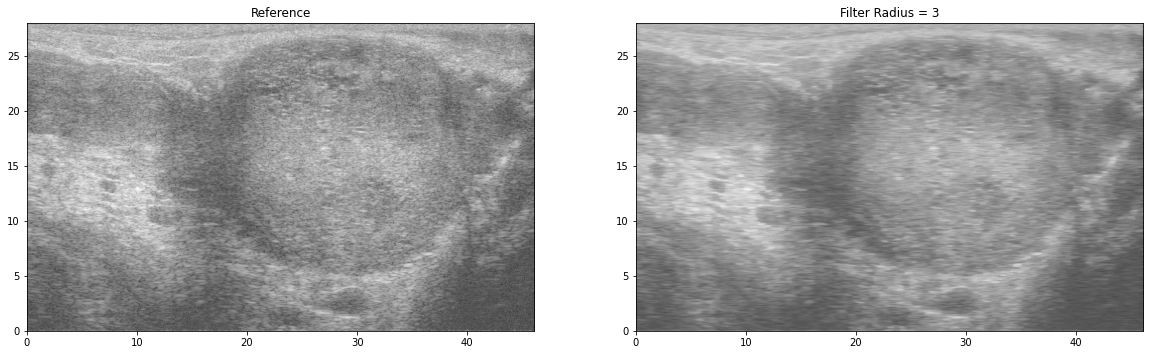

In [95]:
# Median smoothing, kernal radius = 3
median_filter = sitk.MedianImageFilter()
median_filter.SetRadius(3)
smoothed_img1 = median_filter.Execute(prostate_img)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(prostate_img),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(smoothed_img1), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('Filter Radius = 3')
plt.show()
#image_viewer.Execute(smoothed_img)

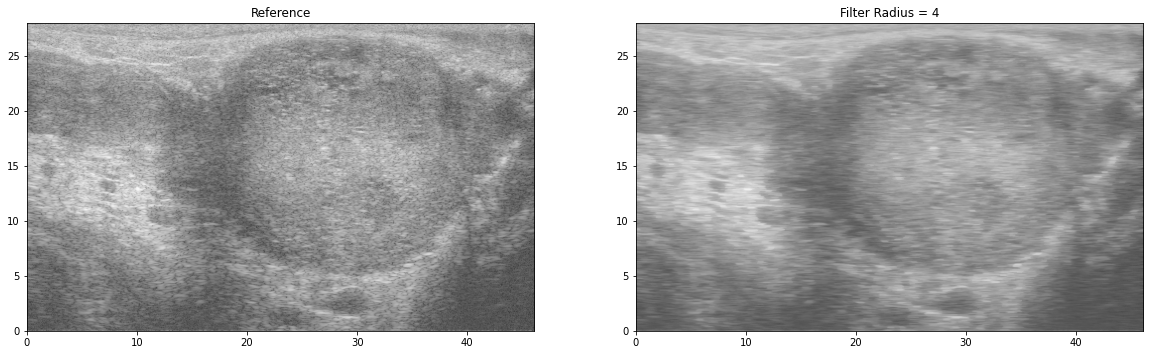

In [96]:
# Median smoothing, kernal radius = 4
median_filter = sitk.MedianImageFilter()
median_filter.SetRadius(4)
smoothed_img2 = median_filter.Execute(prostate_img)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(prostate_img),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(smoothed_img2), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('Filter Radius = 4')
plt.show()

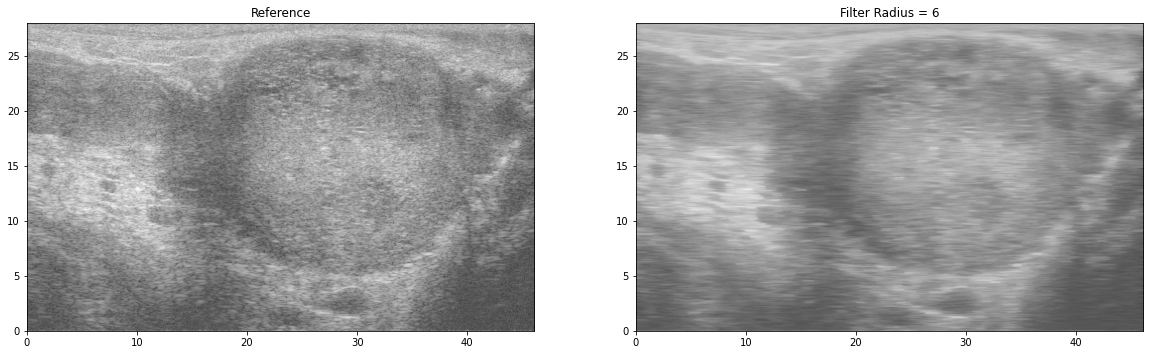

In [97]:
# Median smoothing, kernal radius = 6
median_filter = sitk.MedianImageFilter()
median_filter.SetRadius(6)
smoothed_img3 = median_filter.Execute(prostate_img)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(prostate_img),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(smoothed_img3), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('Filter Radius = 6')
plt.show()

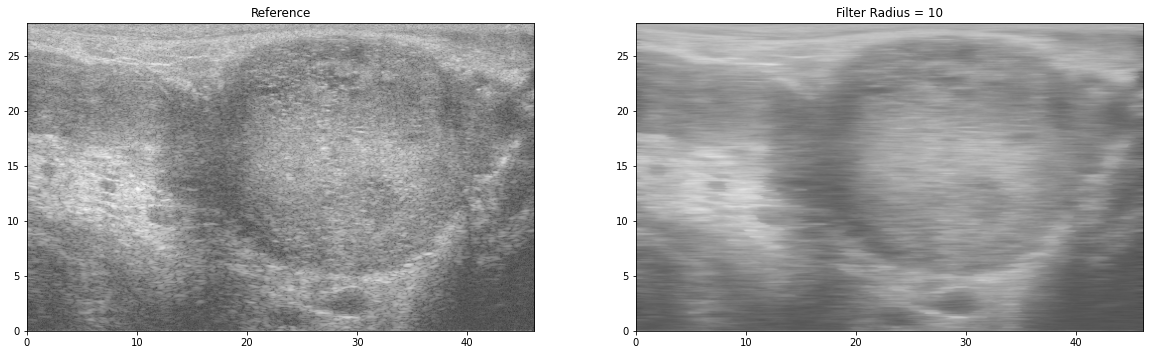

In [98]:
# Median smoothing, kernal radius = 10
median_filter = sitk.MedianImageFilter()
median_filter.SetRadius(10)
smoothed_img4 = median_filter.Execute(prostate_img)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(prostate_img),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(smoothed_img4), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('Filter Radius = 10')
plt.show()

In [ ]:
# Median smoothing, kernal radius = 10
median_filter = sitk.MedianImageFilter()
median_filter.SetRadius(20)
smoothed_img5 = median_filter.Execute(prostate_img)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(prostate_img),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(smoothed_img5), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('Filter Radius = 20')
plt.show()

### b. Plot Histograms and Apply Histogram Equalization

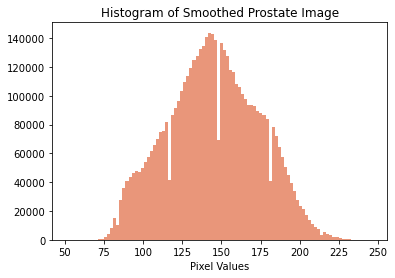

In [76]:
# Plot Histogram for smoothed image with kernal radius = 4
plt.hist(sitk.GetArrayFromImage(smoothed_img2).flatten(), 100, color = 'darksalmon')
plt.title('Histogram of Smoothed Prostate Image')
plt.xlabel('Pixel Values')
plt.show()

In [83]:
# plt.hist(sitk.GetArrayFromImage(smoothed_img1).flatten(), 100, color = 'darksalmon')
# plt.title('Histogram of Smoothed Prostate Image')
# plt.xlabel('Pixel Values')
# plt.show()

In [82]:
# plt.hist(sitk.GetArrayFromImage(smoothed_img3).flatten(), 100, color = 'darksalmon')
# plt.title('Histogram of Smoothed Prostate Image')
# plt.xlabel('Pixel Values')
# plt.show()

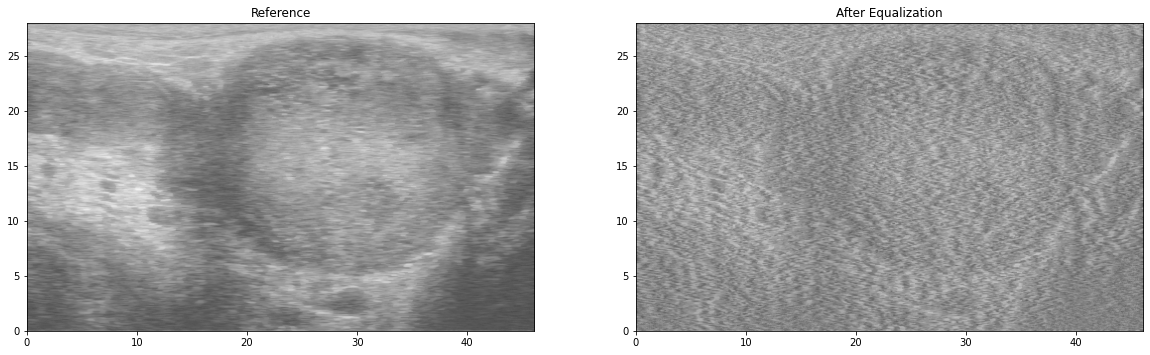

In [100]:
# Histogram Equalization
# hist_equal_filter = sitk.AdaptiveHistogramEqualizationImageFilter()
# equalied_img = hist_equal_filter.Execute(smoothed_img2)
equalied_image = sitk.AdaptiveHistogramEqualization(smoothed_img1)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(smoothed_img1),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(equalied_img), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('After Equalization')
plt.show()

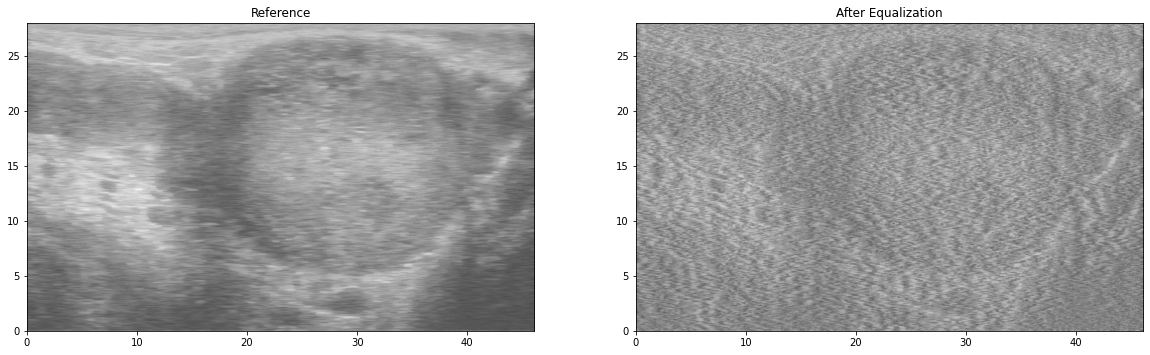

In [101]:
equalied_image = sitk.AdaptiveHistogramEqualization(smoothed_img2)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(smoothed_img2),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(equalied_img), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('After Equalization')
plt.show()

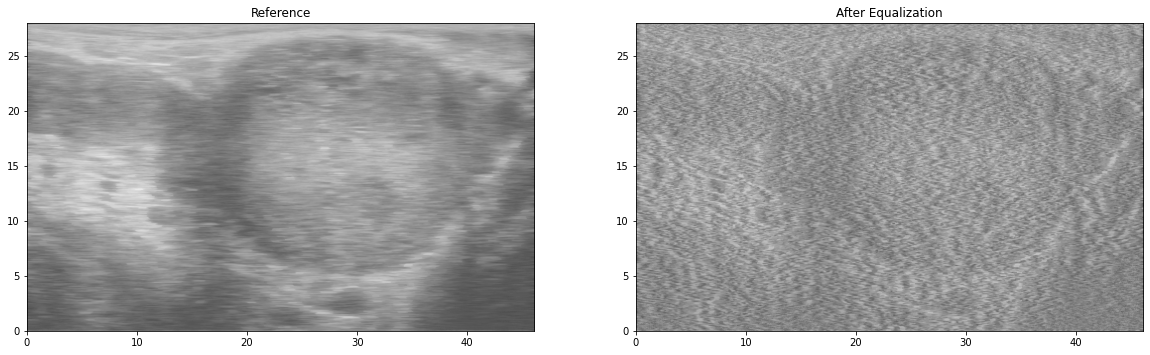

In [102]:
equalied_image = sitk.AdaptiveHistogramEqualization(smoothed_img3)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(smoothed_img3),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(equalied_img), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('After Equalization')
plt.show()

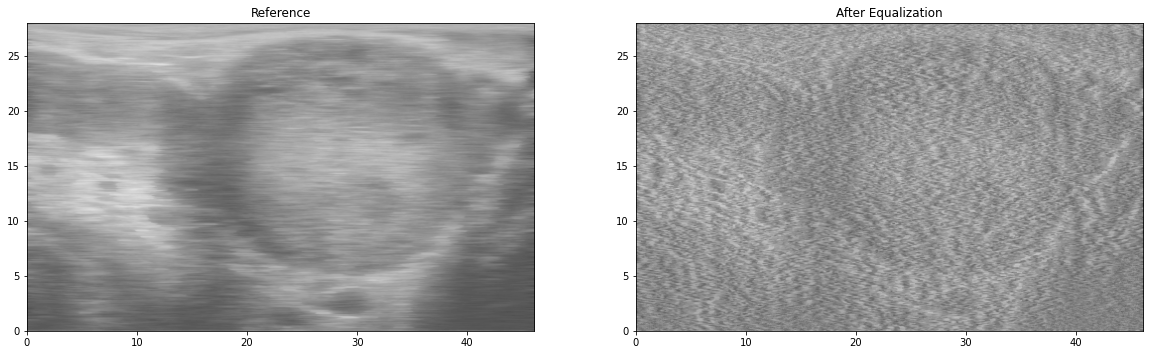

In [103]:
equalied_image = sitk.AdaptiveHistogramEqualization(smoothed_img4)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(smoothed_img4),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(equalied_img), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('After Equalization')
plt.show()

In [ ]:
equalied_image = sitk.AdaptiveHistogramEqualization(smoothed_img5)

# Show reference image and filtered images
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.gray()
plt.imshow(sitk.GetArrayFromImage(smoothed_img4),extent = [0, 46.08, 0, 28], vmin=0, vmax=255)
plt.title('Reference')
#plt.show()
plt.subplot(122)
#plt.figure(figsize=(10,5))
plt.imshow(sitk.GetArrayFromImage(equalied_img), extent = [0, 46.08, 0, 28], vmin=0, vmax=255) # vmax should be tunned based on the nature of the filtered image
plt.title('After Equalization')
plt.show()